# **Linear Regression (40 points)**

The data was collected and made available by “National Institute of Diabetes and Digestive and Kidney Diseases” as part of the Pima Indians Diabetes Database. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here belong to the Pima Indian heritage (subgroup of Native Americans), and are females of ages 21 and above.

**There are 442 samples and 10 feature variables in this data-set.**

The objective is to predict quantitative measure of disease progression one year after baseline

**STEP 1: Importing all the required libraries.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

**STEP 2: Importing Dataset**

We will load the Diabetes DataSet from scikit-learn.

In [ ]:
diabetes_dataset = datasets.load_diabetes()

print(diabetes_dataset.data.shape)
print(diabetes_dataset.target.shape)
print(diabetes_dataset.DESCR)

(442, 10)
(442,)
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note

**STEP 3: Split the Dataset (10 Points)**

**TODO:** Similar to the previous assignments, split the given X and y data into X_train, X_test, y_train, y_test, using test ratio of 0.2.

In [ ]:
X = diabetes_dataset.data
y = diabetes_dataset.target

##### INPUT CODE HERE (~1 line of code) ######

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

##############################################

assert X_train.shape == (353,10)
assert y_train.shape == (353,)
assert X_test.shape == (89,10)
assert y_test.shape == (89,)

print("Size of training data= ", X_train.shape[0]," Samples")
print("Size of testing data= ", X_test.shape[0]," Samples")

Size of training data=  353  Samples
Size of testing data=  89  Samples


**STEP 4: Fit model to training data (10 Points)**

**TODO:** Fit the linear regressor to X_train and y_train data. You may use [this link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) for reference.

In [ ]:
##### INPUT CODE HERE (~2 line of code) ######

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

##############################################



LinearRegression()

**STEP 5: Testing the model (5 Points)**

**TODO:** Find target predictions by giving **X_test** input to your model and store them in **y_pred**.

In [ ]:
##### INPUT CODE HERE (~1 line of code) ######

y_pred = regr.predict(X_test)

##############################################

**STEP 6: Model Evaluation (15 Points)**

**TODO:** **Compute RMSE (Root Mean Square Error) and R2_Score for testing data**. 

For RMSE, you can use sklean_metrics library. You can learn about RMSE from [here](https://towardsdatascience.com/what-does-rmse-really-mean-806b65f2e48e#:~:text=Root%20Mean%20Square%20Error%20(RMSE)%20is%20a%20standard%20way%20to,it%20is%20defined%20as%20follows%3A&text=This%20tells%20us%20heuristically%20that,the%20vector%20of%20observed%20values.).

For R2_Score, you can use sklean_metrics library. You can learn about R2 Score from [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html).

In [ ]:
##### INPUT CODE HERE (~2 line of code) ######

rmse = mean_squared_error(y_test,y_pred, squared=False)
r2 = r2_score(y_test,y_pred)

##############################################
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 58.51766133582009
R2 score is 0.33222203269065154




**STEP 6: Visualise the results**

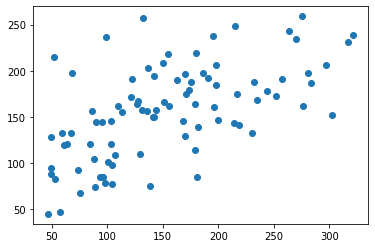

In [ ]:
plt.scatter(y_test, y_pred)
plt.show()

# **Support Vector Machines (60 points)**

SVM is a supervised machine learning algorithm that helps in classification or regression problems. It aims to find an optimal boundary between the possible outputs.

Simply put, SVM does complex data transformations depending on the selected kernel function and based on that transformations, it tries to maximize the separation boundaries between your data points depending on the labels or classes you’ve defined. The data points with the minimum distance to the hyperplane are called Support Vectors.

## **Multiclass Classification using Support Vector Machine**

In its most simple type SVM are applied on binary classification, dividing data points either in 1 or 0. For multiclass classification, the same principle is utilized after breaking down the multiclassification problem into multiple binary classification problems.

The idea is to map data points to high dimensional space to gain mutual linear separation between every two classes. This is called a **One-to-One approach**, which breaks down the multiclass problem into multiple binary classification problems. A binary classifier per each pair of classes.

Another approach one can use is **One-to-Rest**. In that approach, the breakdown is set to a binary classifier per each class.

In **scikit-learn** one-vs-one is not default and needs to be selected explicitly (as can be seen further down in the code). One-vs-rest is set as default. It basically divides the data points in class x and rest. Consecutively a certain class is distinguished from all other classes.

**Objective:**

*This programming assignment will help you understand to:*


*   Use two SVM different classifiers to show the usage of two different kernel functions; Polynomial and RBF.
*   Tune the hyperparameters for both the classifiers. 
*   Calculate the accuracy and f1 scores to show the performance difference between the two selected kernel functions on the same data set.

**In this code, we use the Iris flower data set.** That data set contains three classes of 50 instances each, where each class refers to a type of Iris plant. You can read about Iris dataset from https://archive.ics.uci.edu/ml/datasets/iris.

**STEP 1: Importing all the required libraries.**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

**STEP 2: Importing Dataset**

We will load the Iris DataSet from scikit-learn. For better understanding and visualisation in a 2D plane, we'll use the first two features as X (sepal length and sepal width of the iris flowers).

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target


Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model that would just repeat the labels of the samples that it has just seen would have a perfect score but would fail to predict anything useful on yet-unseen data. **This situation is called overfitting.** To avoid it, it is common practice when performing a (supervised) machine learning experiment to hold out part of the available data as a test set X_test, y_test.

Similarly, when evaluating different settings (“hyperparameters”) for estimators, such as the C setting that must be manually set for an SVM, there is still a risk of overfitting on the test set because the parameters can be tweaked until the estimator performs optimally. This way, knowledge about the test set can “leak” into the model and evaluation metrics no longer report on generalization performance. To solve this problem, yet another part of the dataset can be held out as a so-called “**validation set**”: training proceeds on the training set, after which evaluation is done on the validation set, and when the experiment seems to be successful, final evaluation can be done on the test set.

You can read more about it from [here](https://scikit-learn.org/stable/modules/cross_validation.html).

**STEP 3: Hyperparameter Tuning (30 Points)**

**TODO:** Create two objects from SVM, to create two different classifiers; one with **Polynomial kernel**, and another one with **RBF kernel**. You can read about Polynomial and RBF Kernel from [here](https://scikit-learn.org/stable/modules/svm.html).



**TODO:** For both RBF and Polynomial Kernel, you are required to tune the hyperparameters. 

The [hyperparameters](https://towardsdatascience.com/svm-hyperparameters-explained-with-visualizations-143e48cb701b) you'll be tuning are as follows:

*   For **RBF kernel**, you'll be tuning 'gamma' and 'penalty term (C)'. 
*   For **Polynomial kernel**, you'll be tuning 'degree' and 'penalty term (C)'. 

For the multiclass classification, the type one-versus-one will be specified, i.e. use decision_function_shape=’ovo’.

All other parameters are set to default. 

*NOTE: We select the hyperparameters that give us highest accuracy.*

**RBF kernel**

1. Penalty term, C,: Try values 1 to 3.
2. Penalty term, gamma,: Try values 1 to 5.

**Polynomial kernel**

1. Penalty term, C,: Try values 1 to 3.
2. Penalty term, degree,: Try values 1 to 5.


STEPS:

1. For each possible combination of C and Gamma (rbf kernel) or C and Degree (poly kernel) as given above, compute the accuracy of your model using

   ` cross_val_score(classifier_instance, X, y, cv=5).mean()`

2. Find the hyperparameters, which give you the best accuracy. 

3. Use that hyperparameter for fitting the model.

In [ ]:
##### INPUT CODE HERE (~20 line of code) ######

### RBF Kernel

scores_rbf = []
for c in range(1, 4):
  for g in range(1, 6):
    rbf = svm.SVC(kernel='rbf', gamma=g, C=c, decision_function_shape='ovo')
    score = cross_val_score(rbf, X, y, cv=5).mean()
    scores_rbf.append([[c, g], score])

scores_rbf.sort(key = lambda x: x[1], reverse = True)

gamma_rbf = scores_rbf[0][0][1]
c_rbf = scores_rbf[0][0][0]

print("Best pair of hyperparameters (C, Gamma) for RBF Kernel is (" + str(c_rbf) + ", " + str(gamma_rbf) + ")")

### RBF Kernel

scores_poly = []
for c in range(1, 4):
  for d in range(1, 6):
    poly = svm.SVC(kernel='poly', degree=d, C=c, decision_function_shape='ovo')
    score = cross_val_score(poly, X, y, cv=5).mean()
    scores_poly.append([[c, d], score])

scores_poly.sort(key = lambda x: x[1], reverse = True)

d_poly = scores_poly[0][0][1]
c_poly = scores_poly[0][0][0]

print("Best pair of hyperparameters (Degree, Gamma) for Poly Kernel is (" + str(d_poly) + ", " + str(c_poly) + ")")
##############################################


Best pair of hyperparameters (C, Gamma) for RBF Kernel is (1, 1)
Best pair of hyperparameters (Degree, Gamma) for Poly Kernel is (1, 3)


After hyperparameter tuning, now let's divide the dataset into training and test data. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
  

Now, let us create two objects from SVM, to create two different classifiers; one with Polynomial kernel, and another one with RBF kernel. *Use the best pair of hyperparameters as found above.*

In [ ]:
rbf = svm.SVC(kernel='rbf', gamma=gamma_rbf, C=c_rbf, decision_function_shape='ovo')
poly = svm.SVC(kernel='poly', degree=d_poly, C=c_poly, decision_function_shape='ovo')

rbf.fit(X_train, y_train)
poly.fit(X_train, y_train)

SVC(C=3, decision_function_shape='ovo', degree=1, kernel='poly')

**STEP 5: Testing the model (10 Points)**

**TODO:** Find target predictions by giving X_test input to your two models and store them in y_pred.

In [ ]:
##### INPUT CODE HERE (~2 line of code) ######

poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

##############################################

**STEP 6: Models Evaluation (20 Points)**

**TODO:**

*   Calculate the accuracy and f1 scores for SVM with RBF kernel
*   Calculate the accuracy and f1 scores for SVM with Polynomial kernel

Out of the known metrics for validating machine learning models, we choose Accuracy and F1 as they are the most used in supervised machine learning.

For the **accuracy score**, it shows the percentage of the true positive and true negative to all data points. So, it’s useful when the data set is balanced.

For the **f1 score**, it calculates the harmonic mean between precision and recall, and both depend on the false positive and false negative. So, it’s useful to calculate the f1 score when the data set isn’t balanced.



In [ ]:
##### INPUT CODE HERE (~2 line of code) ######

rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')

##############################################

print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  66.67
F1 (RBF Kernel):  67.22


In [ ]:
##### INPUT CODE HERE (~2 line of code) ######

poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')

##############################################

print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  73.33
F1 (Polynomial Kernel):  74.13


**STEP 7: Visualising Results**

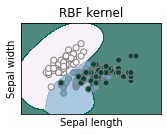

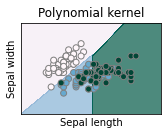

In [ ]:
#stepsize in the mesh, it alters the accuracy of the plotprint
#to better understand it, just play with the value, change it and print it
h = .01
#create the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
# create the title that will be shown on the plot
titles = ['RBF kernel','Polynomial kernel']

for i, clf in enumerate((rbf, poly)):
    #defines how many plots: 2 rows, 2columns=> leading to 4 plots
    plt.subplot(2, 2, i + 1) #i+1 is the index
    #space between plots
    plt.subplots_adjust(wspace=0.4, hspace=0.4) 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.PuBuGn, alpha=0.7)
    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.PuBuGn,     edgecolors='grey')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    plt.show()

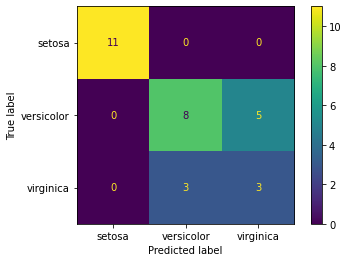

In [ ]:
# creating a confusion matrix
cm_poly = confusion_matrix(y_test, poly_pred)
cmd = ConfusionMatrixDisplay(cm_poly, display_labels=iris.target_names)
cmd.plot()

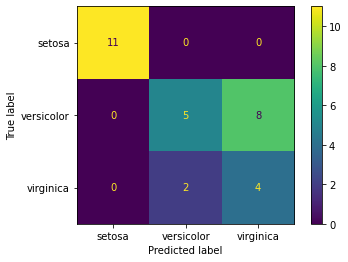

In [ ]:
# creating a confusion matrix
cm_rbf = confusion_matrix(y_test, rbf_pred)
cmd = ConfusionMatrixDisplay(cm_rbf, display_labels=iris.target_names)
cmd.plot()